<a href="https://colab.research.google.com/github/inoueshinichi/PytorchTutorial/blob/main/Pytorch_p1ch3_TorchHub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Torch Hubの使い方


In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
torch.set_printoptions(edgeitems=2)
torch.manual_seed(123)

https://github.com/pytorch/vision/blob/master/hubconf.py  
にあるモデルをネットワーク経由でLoadできる

In [3]:
from torch import hub
resnet18_model = hub.load('pytorch/vision:main', 'resnet18', pretrained=True)

Downloading: "https://github.com/pytorch/vision/zipball/main" to C:\Users\inoue/.cache\torch\hub\main.zip
C:\Users\inoue/.cache\torch\hub\pytorch_vision_main\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: ''If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
C:\Users\inoue/.cache\torch\hub\pytorch_vision_main\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\inoue/.cache\torch\hub\pytorch_vision_main\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `wei

In [4]:
efficientnet_b4 = hub.load('pytorch/vision:main', 'efficientnet_b4', pretrained=True)

Using cache found in C:\Users\inoue/.cache\torch\hub\pytorch_vision_main
C:\Users\inoue/.cache\torch\hub\pytorch_vision_main\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\inoue/.cache\torch\hub\pytorch_vision_main\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B4_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B4_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b4_rwightman-7eb33cd5.pth" to C:\Users\inoue/.cache\torch\hub\checkpoints\efficientnet_b4_rwightman-7eb33cd5.pth
100.0%


In [5]:
efficientnet_b4

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48, bias=False)
            (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(48, 12, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(12, 48, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActiv

ローカル画像(犬)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1280x720 at 0x26307DEEF70>


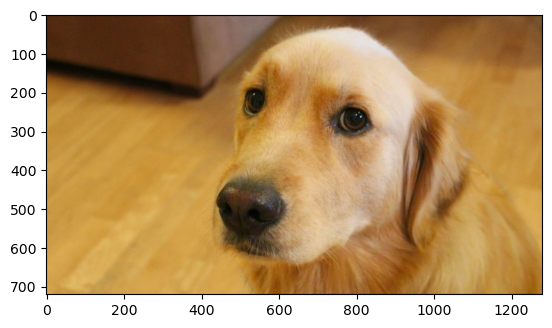

In [7]:
from PIL import Image
img = Image.open("./dlwpt-code-master/data/p1ch2/bobby.jpg")
print(img)
plt.imshow(np.array(img))

前処理

In [9]:
from torchvision import transforms
preprocess = transforms.Compose([
  transforms.Resize(256),
  transforms.CenterCrop(224),
  transforms.ToTensor(),
  transforms.Normalize(
      mean=[0.485, 0.456, 0.406],
      std=[0.229, 0.224, 0.225]
  )
])

In [10]:
img_t = preprocess(img)
print("type: ", type(img_t))
print("size: ", img_t.size())
print(img_t)

type:  <class 'torch.Tensor'>
size:  torch.Size([3, 224, 224])
tensor([[[-0.6281, -0.6623,  ..., -0.0287, -0.0629],
         [-0.7137, -0.7137,  ...,  0.0227,  0.0056],
         ...,
         [ 1.4269,  1.4440,  ...,  0.6734,  0.7077],
         [ 1.4612,  1.4783,  ...,  0.7248,  0.7419]],

        [[-1.2829, -1.2829,  ..., -0.6702, -0.7052],
         [-1.2654, -1.2479,  ..., -0.6527, -0.7052],
         ...,
         [ 0.7654,  0.8354,  ..., -0.2150, -0.1625],
         [ 0.8004,  0.8529,  ..., -0.1275, -0.0749]],

        [[-1.4907, -1.4559,  ..., -1.0898, -1.1421],
         [-1.5081, -1.4559,  ..., -1.0898, -1.1421],
         ...,
         [-0.5321, -0.4798,  ..., -1.2293, -1.1073],
         [-0.4798, -0.4101,  ..., -1.1421, -1.0550]]])


In [11]:
import torch
batch_t = torch.unsqueeze(img_t, 0)
# print(batch_t)
print(batch_t.size())

torch.Size([1, 3, 224, 224])


In [12]:
# 推論モード
efficientnet_b4.eval()

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48, bias=False)
            (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(48, 12, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(12, 48, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActiv

In [13]:
# 推論
out_score = efficientnet_b4(batch_t)
print("size: ", out_score.size())
out_score

size:  torch.Size([1, 1000])


tensor([[-1.2655e+00, -7.4421e-01, -1.5497e+00, -1.4671e+00, -1.3321e+00,
         -1.3962e+00, -1.2065e+00, -1.1794e+00, -5.0681e-01, -9.0432e-01,
         -2.7317e-01, -1.4743e+00, -1.0546e+00, -1.1949e+00, -1.7085e+00,
         -4.7071e-01, -1.7796e+00, -1.0321e+00, -7.3378e-01, -1.4227e+00,
         -4.7039e-01, -1.5525e+00, -2.6542e-01, -8.4758e-01,  2.3752e-01,
          7.3668e-02, -5.9835e-01, -1.3495e-01, -9.5112e-01, -8.5765e-01,
         -9.2598e-01, -6.8501e-01, -3.0607e-01, -8.9367e-01, -1.0227e+00,
         -1.2407e+00, -5.8054e-01, -1.3291e+00, -4.0259e-01, -1.5133e-01,
         -1.5115e+00, -4.5681e-01, -8.8220e-01, -5.5128e-01, -5.9398e-01,
          3.7419e-01, -4.2072e-01, -4.4632e-01, -9.7955e-01,  3.5487e-01,
         -1.7204e-01, -2.6654e-01, -1.7320e+00, -1.0358e+00, -7.7089e-01,
         -4.8915e-01, -3.0233e-01, -8.2912e-01, -1.7636e+00, -6.1265e-01,
         -1.7568e+00, -5.0467e-01, -8.4365e-01, -1.4196e+00, -8.7507e-01,
         -1.1114e-01, -2.5611e-01, -1.

In [17]:
with open("./dlwpt-code-master/data/p1ch2/imagenet_classes.txt") as f:
  labels = [line.strip() for line in f.readlines()]
# print(labels)

max_val, max_idx = torch.max(out_score, 1)
print(f"max_val: {max_val}")
print(f"max_idx: {max_idx}")

# スコアを[0,1]に正規化して、その合計で割ってパーセンテージを取得する
percentage = torch.nn.functional.softmax(out_score, dim=1)[0] * 100 # (1,1000) -> (1000,) -> [0,1] -> % 
print(f"inference category: {labels[max_idx[0]]}, inf %: {percentage[max_idx[0]].item()}")

_, indices = torch.sort(out_score, descending=True) # 降順
print("indice size: ", indices.size())
indices = indices.squeeze(0)
[(labels[idx], percentage[idx].item()) for idx in indices[:5]]

max_val: tensor([10.9342], grad_fn=<MaxBackward0>)
max_idx: tensor([207])
inference category: golden retriever, inf %: 98.16691589355469
indice size:  torch.Size([1, 1000])


[('golden retriever', 98.16691589355469),
 ('Labrador retriever', 0.5061101913452148),
 ('Sussex spaniel', 0.05268874391913414),
 ('cocker spaniel, English cocker spaniel, cocker', 0.04791397973895073),
 ('tennis ball', 0.04409484192728996)]